In [1]:
import sys
sys.path.insert(0, '..')  # adds the src folder in the path - only needed when importing from jupyter notebooks
from matplotlib import pyplot as plt

from src.data_loader import load_data_from_csv
from src.train_test_splitter import train_val_test_split


### Import and process

In [2]:
df = load_data_from_csv(convert_to_pandas=True)

Loading the file using Polars...
File loaded successfully with Polars. Shape: (2302521, 308)
Converted the Polars DataFrame to Pandas.


In [3]:
df_train, _, _ = train_val_test_split(df, train_pct=.6, val_pct=.2, test_pct=.2, shuffle=True, random_state=207) 

### Data Vizualization

In [4]:
from src.dataviz_builders import plot_geographic_maps, plot_regional_distributions, create_geo_insights_table, plot_fire_cause_analysis, plot_infrastructure_effectiveness

In [5]:
plt.style.use('dark_background')

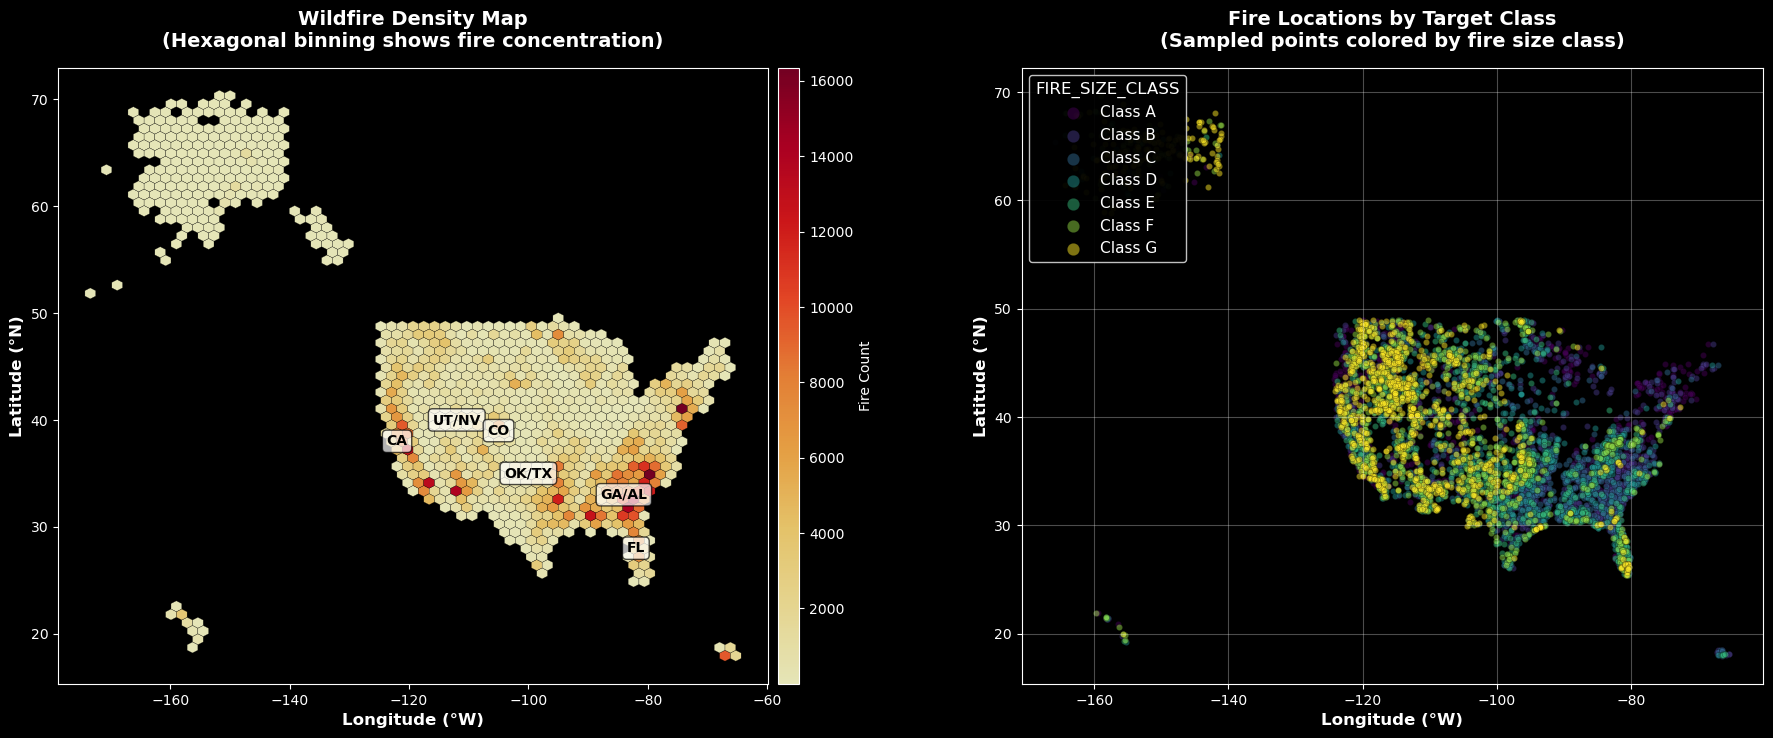

In [6]:
plot_geographic_maps(
    df_train, 
    lat_col='LATITUDE', 
    lon_col='LONGITUDE',
    target='FIRE_SIZE_CLASS',
    figsize=(22, 8)
)

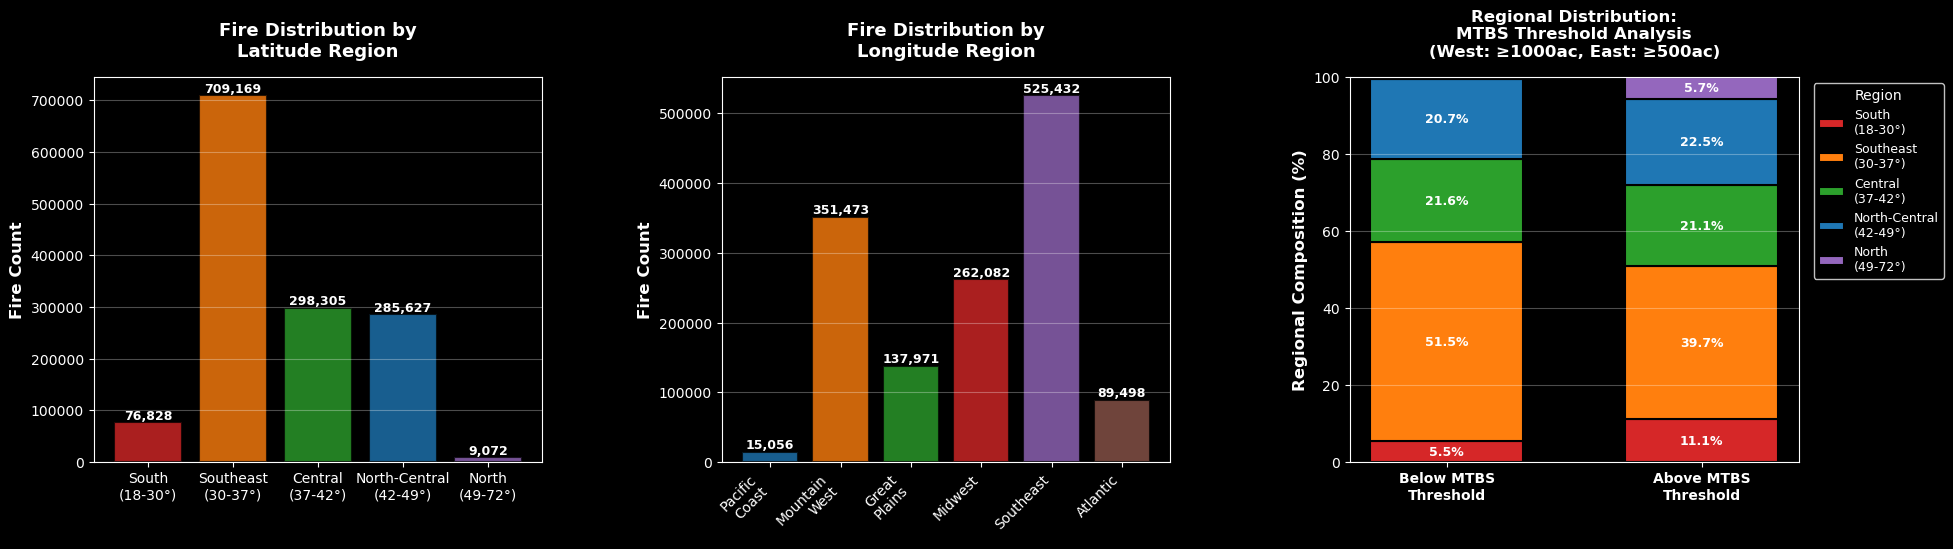

<Figure size 640x480 with 0 Axes>

In [7]:
df_with_regions = plot_regional_distributions(
    df_train,
    lat_col='LATITUDE',
    lon_col='LONGITUDE', 
    target='FIRE_SIZE_CLASS',
    figsize=(22, 5)
)

In [8]:
summary_table = create_geo_insights_table(
   df_train,
    target='FIRE_SIZE_CLASS'
)
summary_table

,Region,Fire Count,Percentage,Avg Latitude,Avg Longitude,Most Common Class,Class %
0,South (18-30°),76828,5.561153,26.221081,-89.042898,B,58.175405
1,Southeast (30-37°),709169,51.332815,33.591638,-93.058908,B,55.061346
2,Central (37-42°),298305,21.592646,39.301379,-100.062959,A,52.469117
3,North-Central (42-49°),285627,20.674956,45.121652,-101.292377,A,51.246556
4,North (49-72°),9072,0.656672,62.994871,-149.397425,A,50.451940


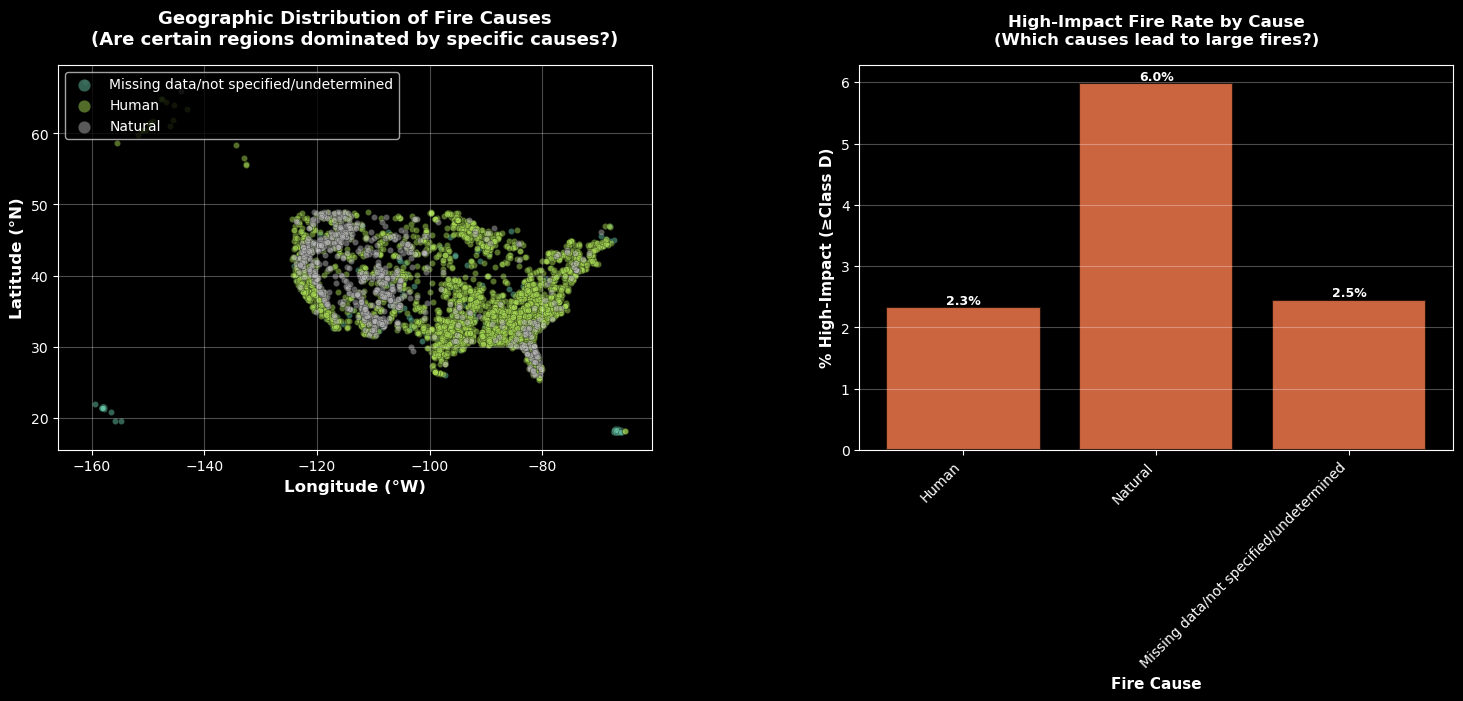

In [9]:
plot_fire_cause_analysis(
    df_train,
    cause_col='NWCG_CAUSE_CLASSIFICATION',
    target='FIRE_SIZE_CLASS',
    lat_col='LATITUDE',
    lon_col='LONGITUDE'
)

posx and posy should be finite values
posx and posy should be finite values


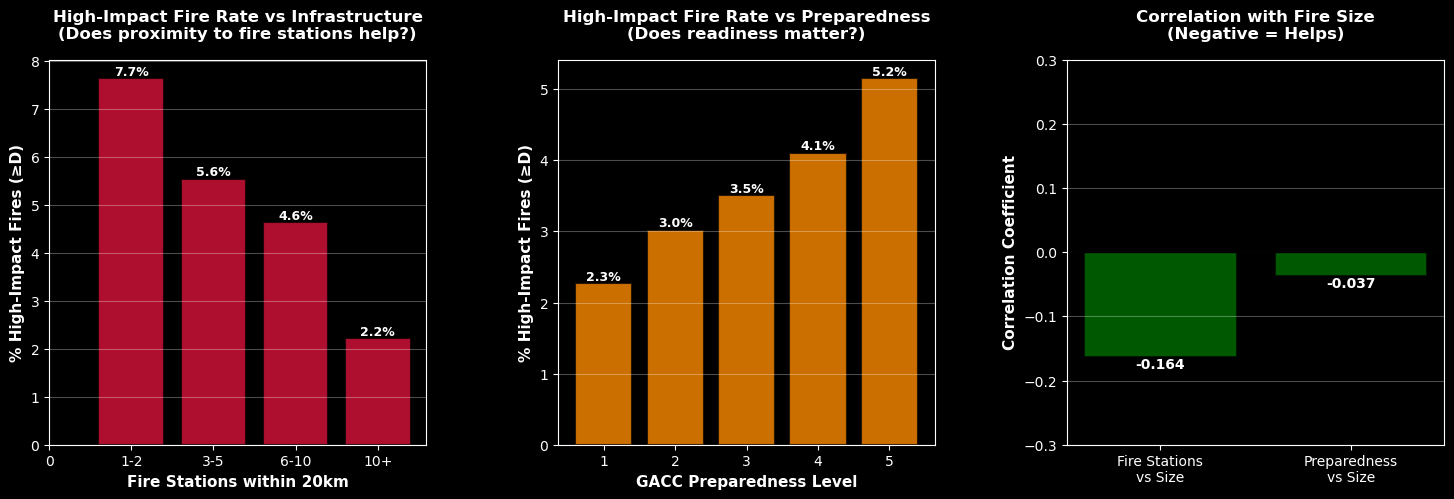

In [10]:
plot_infrastructure_effectiveness(
    df_train,
    firestation_col='No_FireStation_20.0km',
    preparedness_col='GACC_PL',
    target='FIRE_SIZE_CLASS'
)